In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.linear_model import BayesianRidge , Ridge
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from math import sqrt 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
spotify = pd.read_csv("spotify_dataset.csv")
spotify.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,68,6,2021-07-02--2021-07-09,Ramenez la coupe à la maison,5576844,Vegedream,1250353.0,0dqVP9CnGjaYNjya3gYbYy,[],13/8/21,...,0.808,0.660,-6.237,0.0395,0.03580,0.1380,107.994,235556.0,0.804,C
1,15,7,2021-06-04--2021-06-11,Lost Cause,5203319,Billie Eilish,1250353.0,36fhyo5QlxBW7DrDHIOn1G,[],12/8/21,...,0.671,0.336,-8.494,0.2410,0.70500,0.0577,75.051,212496.0,0.518,A#/Bb
2,39,6,2021-05-07--2021-05-14,Higher Power,5142982,Coldplay,1250353.0,4rOEoKL0fHrxBMhVljpbGW,[],13/8/21,...,0.507,0.828,-6.023,0.0449,0.00711,0.2610,178.032,211295.0,0.489,A#/Bb
3,110,10,2021-03-26--2021-04-02,PROBLEMA,5215973,Daddy Yankee,1250353.0,7vzPjsX8UzlPKKtV47qGPn,[],9/8/21,...,0.773,0.800,-3.170,0.0987,0.06130,0.0327,89.988,184507.0,0.842,A#/Bb
4,5,21,2021-03-19--2021-03-26,Hold On,6300416,Justin Bieber,1250353.0,49xx65gvlD7xXjDTavFqaJ,[],13/8/21,...,0.658,0.634,-5.797,0.0413,0.01060,0.1320,139.980,170813.0,0.290,C#/Db


In [6]:
print("Data type : ", type(spotify))
print("Data dims : ", spotify.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1556, 22)


In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   int64  
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1545 non-null   float64
 7   Song ID                    1545 non-null   object 
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1545 non-null   float64
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

In [8]:
spotify_describe = pd.DataFrame(spotify[["Streams", "Artist Followers","Number of Times Charted","Highest Charting Position","Popularity","Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Valence"]])
spotify_describe.describe()

,Streams,Artist Followers,Number of Times Charted,Highest Charting Position,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence
count,1.556000e+03,1.545000e+03,1556.000000,1556.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,6.340219e+06,1.471690e+07,10.668380,87.744216,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,0.514704
std,3.369479e+06,1.667579e+07,16.360546,58.147225,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,0.227326
min,4.176083e+06,4.883000e+03,1.000000,1.000000,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,0.032000
25%,4.915322e+06,2.123734e+06,1.000000,37.000000,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,0.343000
50%,5.275748e+06,6.852509e+06,4.000000,80.000000,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,0.512000
75%,6.455044e+06,2.269875e+07,12.000000,137.000000,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,0.691000
max,4.863345e+07,8.333778e+07,142.000000,200.000000,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,0.979000


In [9]:
spotify.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Song ID                      11
Genre                        11
Release Date                 11
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                        11
dtype: int64

In [10]:
spotify_cleaned = spotify.copy()
spotify_cleaned.dropna(inplace=True)

spotify_cleaned.info()
spotify_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1544
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Week of Highest Charting   1545 non-null   object 
 3   Song Name                  1545 non-null   object 
 4   Streams                    1545 non-null   int64  
 5   Artist                     1545 non-null   object 
 6   Artist Followers           1545 non-null   float64
 7   Song ID                    1545 non-null   object 
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1545 non-null   object 
 11  Popularity                 1545 non-null   float64
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [11]:
spotify_cleaned_describe = pd.DataFrame(spotify_cleaned[["Streams", "Artist Followers","Number of Times Charted","Highest Charting Position","Popularity","Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Valence"]])
spotify_cleaned_describe.describe()

,Streams,Artist Followers,Number of Times Charted,Highest Charting Position,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence
count,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,6.337136e+06,1.471690e+07,10.684142,87.825243,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,0.514704
std,3.375402e+06,1.667579e+07,16.389761,58.132046,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,0.227326
min,4.176083e+06,4.883000e+03,1.000000,1.000000,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,0.032000
25%,4.915080e+06,2.123734e+06,1.000000,37.000000,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,0.343000
50%,5.269163e+06,6.852509e+06,4.000000,80.000000,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,0.512000
75%,6.452492e+06,2.269875e+07,12.000000,137.000000,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,0.691000
max,4.863345e+07,8.333778e+07,142.000000,200.000000,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,0.979000


In [52]:
fig = make_subplots(rows=6, cols = 2)
                    
fig.add_trace(
    go.Box(x= spotify_cleaned['Artist Followers'], name="Artist Followers"),
    row=1, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Number of Times Charted'], name="Chart Times"),
    row=1, col=2
)  

fig.add_trace(
    go.Box(x= spotify_cleaned['Highest Charting Position'], name="Highest Position"),
    row=2, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Popularity'], name="Popularity"),
    row=2, col=2
)
        
fig.add_trace(
    go.Box(x= spotify_cleaned['Danceability'], name="Danceability"),
    row=3, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Energy'], name = 'Energy' ),
    row=3, col=2
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Loudness'], name = 'Loudness'),
    row=4, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Speechiness'], name = 'Speechiness'),
    row=4, col=2
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Acousticness'], name = 'Acousticness'),
    row=5, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Liveness'], name = 'Liveness'),
    row=5, col=2
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Tempo'], name = 'Tempo'),
    row=6, col=1
)

fig.add_trace(
    go.Box(x= spotify_cleaned['Valence'], name = 'Valence'),
    row=6, col=2
)

fig.update_layout(height=1000, width=1010, title_text="Box plots of Variables that affect Streams")
fig.show()

In [13]:
fig2 = make_subplots(rows=6, cols = 2)
                    
fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Artist Followers'], name="Artist Followers"),
    row=1, col=1
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Number of Times Charted'], name = 'Chart Times' ),
    row=1, col=2
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Highest Charting Position'], name = 'Highest Position'),
    row=2, col=1
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Popularity'], name = 'Popularity'),
    row=2, col=2
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Danceability'], name="Danceability"),
    row=3, col=1
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Energy'], name = 'Energy' ),
    row=3, col=2
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Loudness'], name = 'Loudness'),
    row=4, col=1
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Speechiness'], name = 'Speechiness'),
    row=4, col=2
)

fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Acousticness'], name = 'Acousticness'),
    row=5, col=1
)
fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Liveness'], name = 'Liveness'),
    row=5, col=2
)
fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Tempo'], name = 'Tempo'),
    row=6, col=1
)
fig2.add_trace(
    go.Histogram(x= spotify_cleaned['Valence'], name = 'Valence'),
    row=6, col=2
)


fig2.update_layout(height=1000, width=1000, title_text="Histogram of Variables that affect Streams ")
fig2.show()

In [14]:
fig3 = make_subplots(rows=6, cols = 2)
                    
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Artist Followers'], name="Artist Followers"),
    row=1, col=1
)

fig3.add_trace(
    go.Violin(x= spotify_cleaned['Number of Times Charted'], name = 'Chart Times' ),
    row=1, col=2
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Highest Charting Position'], name = 'Highest Position'),
    row=2, col=1
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Popularity'], name = 'Popularity'),
    row=2, col=2
)
  
    
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Danceability'], name="Danceability"),
    row=3, col=1
)

fig3.add_trace(
    go.Violin(x= spotify_cleaned['Energy'], name = 'Energy' ),
    row=3, col=2
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Loudness'], name = 'Loudness'),
    row=4, col=1
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Speechiness'], name = 'Speechiness'),
    row=4, col=2
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Acousticness'], name = 'Acousticness'),
    row=5, col=1
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Liveness'], name = 'Liveness'),
    row=5, col=2
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Tempo'], name = 'Tempo'),
    row=6, col=1
)
fig3.add_trace(
    go.Violin(x= spotify_cleaned['Valence'], name = 'Valence'),
    row=6, col=2
)


fig3.update_layout(height=1000, width=1000, title_text="Violin plots of Variables that affect Streams ")
fig3.show()

In [15]:
chord = px.bar(spotify_cleaned, x='Chord', color = "Chord", height=400)
chord.update_layout(xaxis={'categoryorder':'total ascending'})
chord.show()

In [16]:
boxplot = px.box(spotify_cleaned, x = 'Streams', points="all")
boxplot.show()

In [17]:
hist = px.histogram(spotify_cleaned, x = "Streams")
hist.show()

In [18]:
violin = px.violin(spotify_cleaned, x= "Streams")
violin.show()

In [19]:
spotify_cleaned['Song ID'].value_counts().head(40)

5uEYRdEIh9Bo4fpjDd4Na9    3
73O30uMI7n6DuzBmbtO7kC    2
4ZRrLHqzhGRXYj2qcB4s5S    2
4umIPjkehX1r7uhmGvXiSV    2
0oQc0F6KUE7QY7k5TU6bic    2
1iQDltZqI7BXnHrFy4Qo1k    2
1D3z6HTiQsNmZxjl7F7eoG    2
35UUpTmrcFXNIVIN26ujXl    2
4lUmnwRybYH7mMzf16xB0y    2
463CkQjx2Zk1yXoBuierM9    2
5VwwpU7KsLhgfbMEecedhJ    2
7ygpwy2qP3NbrxVkHvUhXY    2
1WedZeiezCmCEOzLwhx0hV    2
2MbdDtCv5LUVjYy9RuGTgC    2
0t3ZvGKlmYmVsDzBJAXK8C    2
27RSJHEA99Y0Vsow7nA37A    2
2AlYncTpVHKwHb55F9lF6O    2
0GzuHFG4Ql6DoyxFRnIk3F    2
6uvMKqNlrSvcC4NaKnrwjZ    2
07Oz5StQ7GRoygNLaXs2pd    2
02kDW379Yfd5PzW5A6vuGt    2
1SV1fxF65n9NhRHp3KlBuu    2
0e6NlGJxYlHvAN8SKxad7N    2
2YpeDb67231RjR0MgVLzsG    2
3yZCjDTxzZxx1kll1sRjGc    2
37BZB0z9T8Xu7U3e65qxFy    2
4S2uhQE8L9V6p7rj7SiauJ    2
7wsmIIm0xWmtP7TmACXkJn    2
5hvwx5i67IwnCkjl9VHkNv    1
7C1trmcQQ5n5RNy4l6ziCv    1
0d2iYfpKoM0QCKvcLCkBao    1
3g0mEQx3NTanacLseoP0Gw    1
1zwMYTA5nlNjZxYrvBB2pV    1
6mADjHs6FXdroPzEGW6KVJ    1
35RJhm1pEovTBwnNR0zWad    1
4vUmTMuQqjdnvlZmAH61

In [20]:
spotify_cleaned2 = spotify_cleaned.copy()
spotify_cleaned2.drop_duplicates(subset="Song ID",inplace=True,ignore_index=True)
spotify_cleaned2

(spotify_cleaned2["Popularity"]==73).value_counts()

False    1464
True       52
Name: Popularity, dtype: int64

In [21]:
spotify_cleaned3 = spotify_cleaned2.copy()

spotify_cleaned4 = pd.DataFrame(spotify_cleaned3[["Release Date","Popularity"]])

for i in ["6","7","8","9","10","11","12","13"]:
    
    print(spotify_cleaned4[spotify_cleaned4["Release Date"] == i+"/8/21"].value_counts())
    print()

Release Date  Popularity
6/8/21        0.0           5
dtype: int64

Series([], dtype: int64)

Release Date  Popularity
8/8/21        0.0           1
dtype: int64

Release Date  Popularity
9/8/21        0.0           5
dtype: int64

Release Date  Popularity
10/8/21       0.0           1
              15.0          1
dtype: int64

Release Date  Popularity
11/8/21       0.0           1
              1.0           1
dtype: int64

Release Date  Popularity
12/8/21       0.0           3
              2.0           1
              3.0           1
dtype: int64

Release Date  Popularity
13/8/21       0.0           20
              1.0            4
              2.0            1
dtype: int64



In [22]:
print(spotify_cleaned4[spotify_cleaned["Popularity"] == 0].value_counts())
print()
print(spotify_cleaned4[spotify_cleaned["Popularity"] == 1].value_counts())
print()
print(spotify_cleaned4[spotify_cleaned["Popularity"] == 2].value_counts())
print()
print(spotify_cleaned4[spotify_cleaned["Popularity"] == 3].value_counts())
print()
print(spotify_cleaned4[spotify_cleaned["Popularity"] == 15].value_counts())
print()

Release Date  Popularity
13/8/21       0.0           20
6/8/21        0.0            5
9/8/21        0.0            5
12/8/21       0.0            3
10/8/21       0.0            1
11/8/21       0.0            1
8/8/21        0.0            1
dtype: int64

Release Date  Popularity
13/8/21       1.0           4
11/8/21       1.0           1
dtype: int64

Release Date  Popularity
12/8/21       2.0           1
13/8/21       2.0           1
dtype: int64

Release Date  Popularity
12/8/21       3.0           1
dtype: int64

Release Date  Popularity
10/8/21       15.0          1
dtype: int64



C:\Users\LAMHAO~1\AppData\Local\Temp/ipykernel_21124/475504721.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LAMHAO~1\AppData\Local\Temp/ipykernel_21124/475504721.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LAMHAO~1\AppData\Local\Temp/ipykernel_21124/475504721.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LAMHAO~1\AppData\Local\Temp/ipykernel_21124/475504721.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LAMHAO~1\AppData\Local\Temp/ipykernel_21124/475504721.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [23]:
spotify_cleaned3["Popularity"].median()

73.0

In [24]:
spotify_cleaned3["Popularity"] = spotify_cleaned3["Popularity"].replace([0,1,2,3,15],73)

(spotify_cleaned3["Popularity"]==73).value_counts()

False    1419
True       97
Name: Popularity, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

#encode the genre

genre_encoder = LabelEncoder()  
spotify_cleaned3['Genre'] = genre_encoder.fit_transform(spotify_cleaned3['Genre'])  
spotify_cleaned3.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,68,6,2021-07-02--2021-07-09,Ramenez la coupe à la maison,5576844,Vegedream,1250353.0,0dqVP9CnGjaYNjya3gYbYy,393,13/8/21,...,0.808,0.660,-6.237,0.0395,0.03580,0.1380,107.994,235556.0,0.804,C
1,15,7,2021-06-04--2021-06-11,Lost Cause,5203319,Billie Eilish,1250353.0,36fhyo5QlxBW7DrDHIOn1G,393,12/8/21,...,0.671,0.336,-8.494,0.2410,0.70500,0.0577,75.051,212496.0,0.518,A#/Bb
2,39,6,2021-05-07--2021-05-14,Higher Power,5142982,Coldplay,1250353.0,4rOEoKL0fHrxBMhVljpbGW,393,13/8/21,...,0.507,0.828,-6.023,0.0449,0.00711,0.2610,178.032,211295.0,0.489,A#/Bb
3,110,10,2021-03-26--2021-04-02,PROBLEMA,5215973,Daddy Yankee,1250353.0,7vzPjsX8UzlPKKtV47qGPn,393,9/8/21,...,0.773,0.800,-3.170,0.0987,0.06130,0.0327,89.988,184507.0,0.842,A#/Bb
4,5,21,2021-03-19--2021-03-26,Hold On,6300416,Justin Bieber,1250353.0,49xx65gvlD7xXjDTavFqaJ,393,13/8/21,...,0.658,0.634,-5.797,0.0413,0.01060,0.1320,139.980,170813.0,0.290,C#/Db


In [26]:
final_cleaned = pd.DataFrame(spotify_cleaned3[["Song Name","Artist", "Streams","Artist Followers","Highest Charting Position","Number of Times Charted","Genre","Popularity","Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Valence", "Chord"]])
final_cleaned

,Song Name,Artist,Streams,Artist Followers,Highest Charting Position,Number of Times Charted,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Chord
0,Ramenez la coupe à la maison,Vegedream,5576844,1250353.0,68,6,393,73.0,0.808,0.660,-6.237,0.0395,0.03580,0.1380,107.994,0.804,C
1,Lost Cause,Billie Eilish,5203319,1250353.0,15,7,393,73.0,0.671,0.336,-8.494,0.2410,0.70500,0.0577,75.051,0.518,A#/Bb
2,Higher Power,Coldplay,5142982,1250353.0,39,6,393,73.0,0.507,0.828,-6.023,0.0449,0.00711,0.2610,178.032,0.489,A#/Bb
3,PROBLEMA,Daddy Yankee,5215973,1250353.0,110,10,393,73.0,0.773,0.800,-3.170,0.0987,0.06130,0.0327,89.988,0.842,A#/Bb
4,Hold On,Justin Bieber,6300416,1250353.0,5,21,393,73.0,0.658,0.634,-5.797,0.0413,0.01060,0.1320,139.980,0.290,C#/Db
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,MONTERO (Call Me By Your Name),Lil Nas X,30071134,5473565.0,1,18,312,97.0,0.610,0.508,-6.682,0.1520,0.29700,0.3840,178.818,0.758,G#/Ab
1512,Bad Habits,Ed Sheeran,37799456,83293380.0,3,5,363,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,0.591,B
1513,STAY (with Justin Bieber),The Kid LAROI,47248719,2230022.0,2,3,63,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,0.478,C#/Db
1514,good 4 u,Olivia Rodrigo,40162559,6266514.0,1,11,364,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,0.688,A


In [28]:
from sklearn.preprocessing import OneHotEncoder

#one hot encoder for chords

enc = OneHotEncoder(handle_unknown = 'ignore')
chords = final_cleaned['Chord']
final_dataset = pd.DataFrame(enc.fit_transform(final_cleaned[['Chord']]).toarray())
final_dataset.columns = enc.get_feature_names(['Chord'])
final_cleaned = final_cleaned.join(final_dataset)
final_cleaned.drop(['Chord'], axis=1, inplace=True)

KeyError: 'Chord'

In [30]:
final_cleaned1 = pd.DataFrame(final_cleaned.drop(columns = ['Song Name','Artist']))
final_cleaned1

,Streams,Artist Followers,Highest Charting Position,Number of Times Charted,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,...,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
0,5576844,1250353.0,68,6,393,73.0,0.808,0.660,-6.237,0.0395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5203319,1250353.0,15,7,393,73.0,0.671,0.336,-8.494,0.2410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5142982,1250353.0,39,6,393,73.0,0.507,0.828,-6.023,0.0449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5215973,1250353.0,110,10,393,73.0,0.773,0.800,-3.170,0.0987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6300416,1250353.0,5,21,393,73.0,0.658,0.634,-5.797,0.0413,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,30071134,5473565.0,1,18,312,97.0,0.610,0.508,-6.682,0.1520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1512,37799456,83293380.0,3,5,363,98.0,0.808,0.897,-3.712,0.0348,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1513,47248719,2230022.0,2,3,63,99.0,0.591,0.764,-5.484,0.0483,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,40162559,6266514.0,1,11,364,99.0,0.563,0.664,-5.044,0.1540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model 1: Linear Regression

In [26]:
final_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Streams                    1516 non-null   int64  
 1   Artist Followers           1516 non-null   float64
 2   Highest Charting Position  1516 non-null   int64  
 3   Number of Times Charted    1516 non-null   int64  
 4   Genre                      1516 non-null   int32  
 5   Popularity                 1516 non-null   float64
 6   Danceability               1516 non-null   float64
 7   Energy                     1516 non-null   float64
 8   Loudness                   1516 non-null   float64
 9   Speechiness                1516 non-null   float64
 10  Acousticness               1516 non-null   float64
 11  Liveness                   1516 non-null   float64
 12  Tempo                      1516 non-null   float64
 13  Valence                    1516 non-null   float

In [27]:
final_cleaned1.describe()

,Streams,Artist Followers,Highest Charting Position,Number of Times Charted,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,...,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
count,1.516000e+03,1.516000e+03,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,...,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,6.323646e+06,1.472976e+07,88.304749,10.601583,222.264512,72.104881,0.689230,0.633205,-6.356555,0.123715,...,0.091029,0.100923,0.139182,0.081135,0.025726,0.073219,0.083773,0.076517,0.087731,0.085092
std,3.350072e+06,1.672339e+07,58.219054,16.340182,112.509605,10.251566,0.142022,0.161869,2.511191,0.110397,...,0.287745,0.301327,0.346251,0.273132,0.158368,0.260582,0.277139,0.265911,0.282996,0.279111
min,4.176083e+06,4.883000e+03,1.000000,1.000000,0.000000,29.000000,0.150000,0.054000,-25.166000,0.023200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.914980e+06,2.120518e+06,38.000000,1.000000,114.750000,66.000000,0.598750,0.532000,-7.501000,0.045600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.261910e+06,6.852509e+06,81.500000,4.000000,221.500000,73.000000,0.704500,0.642000,-6.000500,0.075750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.442495e+06,2.269875e+07,138.000000,12.000000,317.000000,79.250000,0.794000,0.751250,-4.718500,0.166250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.863345e+07,8.333778e+07,200.000000,142.000000,393.000000,100.000000,0.980000,0.970000,1.509000,0.884000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
X = final_cleaned1.drop(columns=["Streams"])
y = pd.DataFrame(final_cleaned1["Streams"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
X_train.shape

(1212, 25)

<AxesSubplot:>

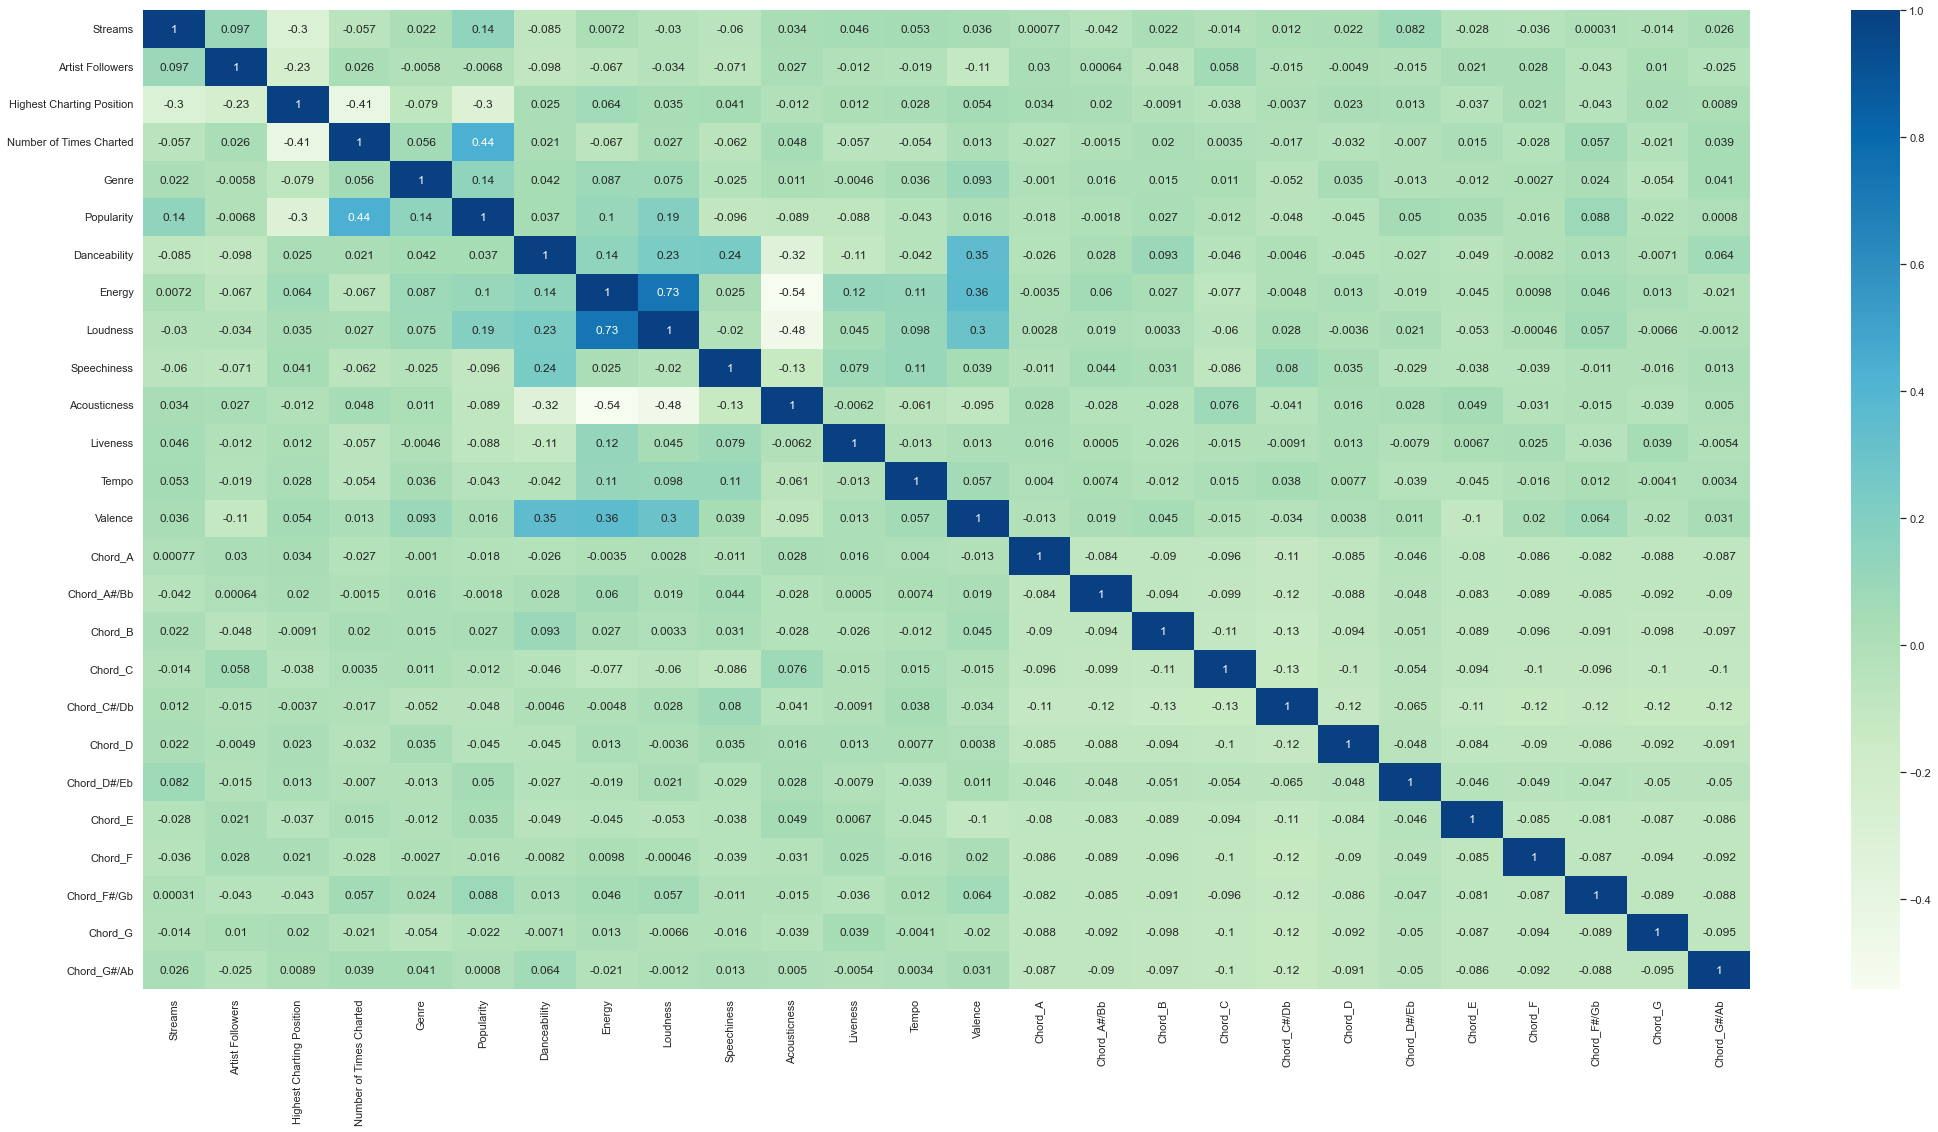

In [31]:
#Calculating Correlation
corrdf = pd.DataFrame(final_cleaned1)

#Plotting Correlation
plt.figure(figsize=(36,18))
sb.heatmap(corrdf.corr(),annot=True,cmap="GnBu")

Intercept of Regression 	: b =  [3539463.42351459]
Coefficients of Regression 	: a =  [[ 7.28647774e-03 -2.15403514e+04 -5.91533000e+04 -7.28829863e+02
   6.27524223e+04 -1.62770828e+06  3.24531125e+05 -4.61884736e+04
  -1.50584012e+06  5.77158397e+05  1.15803071e+06  8.30921640e+03
   7.38560214e+05  8.01551432e+03 -5.70506568e+05  4.36526713e+05
  -3.62895923e+05  1.33968719e+05  3.12911242e+05  1.13386326e+06
  -6.52575981e+05 -5.11652388e+05 -1.83841669e+05 -1.21592121e+05
   3.77779206e+05]]

                   Predictors  Coefficients
0            Artist Followers  7.286478e-03
1   Highest Charting Position -2.154035e+04
2     Number of Times Charted -5.915330e+04
3                       Genre -7.288299e+02
4                  Popularity  6.275242e+04
5                Danceability -1.627708e+06
6                      Energy  3.245311e+05
7                    Loudness -4.618847e+04
8                 Speechiness -1.505840e+06
9                Acousticness  5.771584e+05
10           

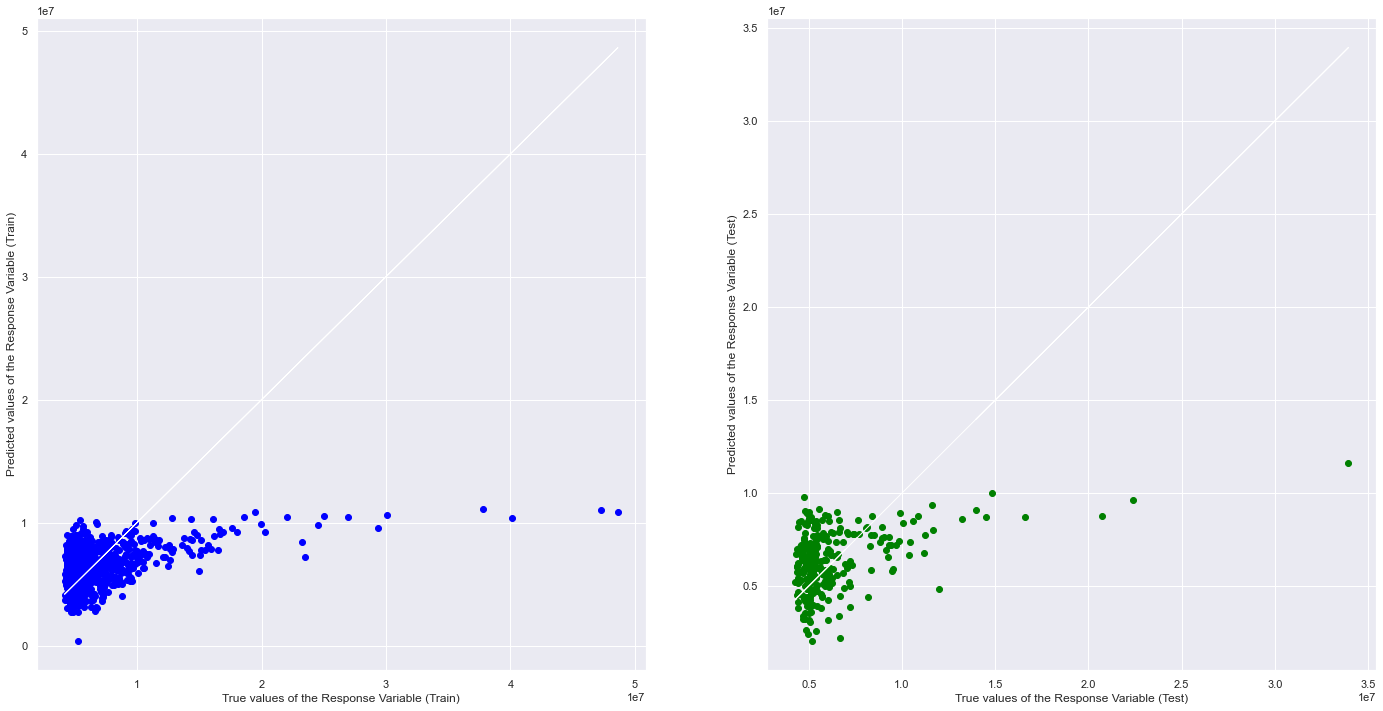

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18275313941605853
Mean Squared Error (MSE) 	: 9882097757708.56
Root Mean Squared Error (RMSE) 	: 3143580.4042060957
Mean Absolute Percentage error (MAPE) 	: 27.75%

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12749631415161833
Mean Squared Error (MSE) 	: 6704712455404.408
Root Mean Squared Error (RMSE) 	: 2589345.9512788956
Mean Absolute Percentage error (MAPE) 	: 27.42%



In [32]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" 
      .format(mean_absolute_percentage_error(y_train_pred, y_train.values.ravel())*100))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" 
      .format(mean_absolute_percentage_error(y_test_pred, y_test.values.ravel())*100))
print()

# Model 2: Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_percentage_error

In [34]:
X = final_cleaned1.drop(columns=["Streams"])
y = pd.DataFrame(final_cleaned1["Streams"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
X_train.shape

(1212, 25)

In [36]:
#Function to evaluate accuracy of model based on MAPE
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [37]:
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, y_test.values.ravel())

y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

Model Performance
Average Error: 572247.2138
Accuracy = 91.74%.


In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,20,30,40,50,60],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(base_model, param_grid, n_jobs = -1,scoring = 'neg_mean_absolute_percentage_error')

In [39]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test.values.ravel())
print(grid_search.best_params_)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 553965.3131
Accuracy = 92.08%.
{'max_depth': 20, 'n_estimators': 70}
Improvement of 0.37%.


In [40]:
y_train_pred1 = best_grid.predict(X_train)
y_test_pred1 = best_grid.predict(X_test)

In [41]:
# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Base Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base_model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred)*100))
print()

#Prediction Accuracy of Base Model
MSE_predicted = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Base Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred)*100))
print()


# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred1)
print("Goodness of Fit of Tuned Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", best_grid.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred1)*100))
print()

#Prediction Accuracy of Model
MSE_predicted = mean_squared_error(y_test, y_test_pred1)
print("Goodness of Fit of Tuned Model \tTest Dataset")
print("Explained Variance (R^2) \t:", best_grid.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred1)*100))
print()


Goodness of Fit of Base Model 	Train Dataset
Explained Variance (R^2) 	: 0.9740141718295839
Mean Squared Error (MSE) 	: 314219003682.171
Root Mean Squared Error (RMSE) 	: 560552.4093982391
Mean Absolute Percentage error (MAPE) 	: 3.74%

Goodness of Fit of Base Model 	Test Dataset
Explained Variance (R^2) 	: 0.8174158890275129
Mean Squared Error (MSE) 	: 1403058786858.7
Root Mean Squared Error (RMSE) 	: 1184507.824735109
Mean Absolute Percentage error (MAPE) 	: 8.26%

Goodness of Fit of Tuned Model 	Train Dataset
Explained Variance (R^2) 	: 0.980969627643349
Mean Squared Error (MSE) 	: 230114068421.92776
Root Mean Squared Error (RMSE) 	: 479702.062140583
Mean Absolute Percentage error (MAPE) 	: 3.49%

Goodness of Fit of Tuned Model 	Test Dataset
Explained Variance (R^2) 	: 0.8276894970473078
Mean Squared Error (MSE) 	: 1324111741969.963
Root Mean Squared Error (RMSE) 	: 1150700.5440035053
Mean Absolute Percentage error (MAPE) 	: 7.92%



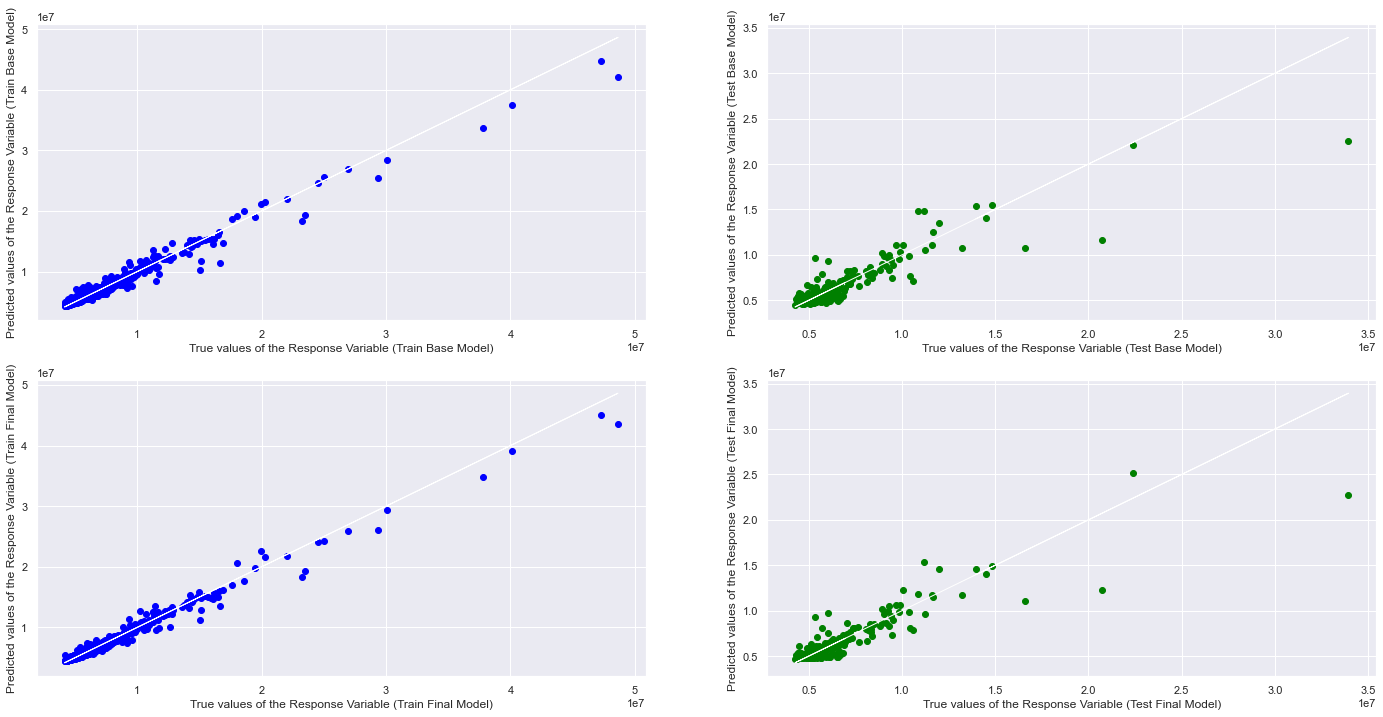

In [42]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0,0].scatter(y_train, y_train_pred, color = "blue")
axes[0,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable (Train Base Model)")
axes[0,0].set_ylabel("Predicted values of the Response Variable (Train Base Model)")
axes[0,1].scatter(y_test, y_test_pred, color = "green")
axes[0,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable (Test Base Model)")
axes[0,1].set_ylabel("Predicted values of the Response Variable (Test Base Model)")
axes[1,0].scatter(y_train, y_train_pred1, color = "blue")
axes[1,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable (Train Final Model)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train Final Model)")
axes[1,1].scatter(y_test, y_test_pred1, color = "green")
axes[1,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable (Test Final Model)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test Final Model)")
plt.show()

# Model 3: Gradient Boosted Regression

In [51]:
X = final_cleaned1.drop(columns=["Streams"])
y = pd.DataFrame(final_cleaned1["Streams"])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
X_train.shape

(1212, 25)

In [53]:
#Function to evaluate accuracy of model based on MAPE
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy



#def evaluate(model, test_features, test_labels):
 #   predictions = model.predict(test_features)
  #  errors = abs(predictions - test_labels)
   # mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    #print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    #return accuracy

In [54]:
gbrt=GradientBoostingRegressor(learning_rate=0.01)  
gbrt.fit(X_train, np.ravel(y_train)) 

base_accuracy = evaluate(gbrt, X_test, np.ravel(y_test))

y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

Model Performance
Average Error: 1153862.9820
Accuracy = 82.71%.


In [59]:
gbr=GradientBoostingRegressor()
grid = {
    
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'n_estimators' : np.arange(100,1200,100),
    'max_depth' : [3,4,5,6,7],}
    
gb_cv = GridSearchCV(gbr,grid,n_jobs = -1,scoring = 'neg_mean_absolute_percentage_error')
gb_cv.fit(X_train,np.ravel(y_train))

best_grid1 = gb_cv.best_estimator_
grid_accuracy = evaluate(best_grid1, X_test, np.ravel(y_test))
print("Best Parameters:",gb_cv.best_params_)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 600607.6316
Accuracy = 91.42%.
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Improvement of 10.54%.


In [60]:
y_train_pred2 = best_grid1.predict(X_train)
y_test_pred2=best_grid1.predict(X_test)

In [61]:
# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred)
print("Goodness of Fit of Base Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbrt.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred)*100))
print()

#Prediction Accuracy of Base Model
MSE_predicted = mean_squared_error(y_test, y_test_pred)
print("Goodness of Fit of Base Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbrt.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred)*100))
print()


# Goodness of fit for train data
MSE_train = mean_squared_error(y_train, y_train_pred2)
print("Goodness of Fit of Tuned Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", best_grid1.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", MSE_train)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_train))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_train.values.ravel(),y_train_pred2)*100))
print()

#Prediction Accuracy of Model
MSE_predicted = mean_squared_error(y_test, y_test_pred2)
print("Goodness of Fit of Tuned Model \tTest Dataset")
print("Explained Variance (R^2) \t:", best_grid1.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", MSE_predicted)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(MSE_predicted))
print("Mean Absolute Percentage error (MAPE) \t: {:0.2f}%" .format(mean_absolute_percentage_error(y_test.values.ravel(),y_test_pred2)*100))
print()

Goodness of Fit of Base Model 	Train Dataset
Explained Variance (R^2) 	: 0.6629861969177899
Mean Squared Error (MSE) 	: 4075149759983.0405
Root Mean Squared Error (RMSE) 	: 2018700.01733369
Mean Absolute Percentage error (MAPE) 	: 18.06%

Goodness of Fit of Base Model 	Test Dataset
Explained Variance (R^2) 	: 0.4977933249617831
Mean Squared Error (MSE) 	: 3859182951235.222
Root Mean Squared Error (RMSE) 	: 1964480.3259985126
Mean Absolute Percentage error (MAPE) 	: 17.29%

Goodness of Fit of Tuned Model 	Train Dataset
Explained Variance (R^2) 	: 0.9771295088264584
Mean Squared Error (MSE) 	: 276548544196.6217
Root Mean Squared Error (RMSE) 	: 525878.83033701
Mean Absolute Percentage error (MAPE) 	: 6.07%

Goodness of Fit of Tuned Model 	Test Dataset
Explained Variance (R^2) 	: 0.7951809013919175
Mean Squared Error (MSE) 	: 1573922475991.637
Root Mean Squared Error (RMSE) 	: 1254560.6705104527
Mean Absolute Percentage error (MAPE) 	: 8.58%



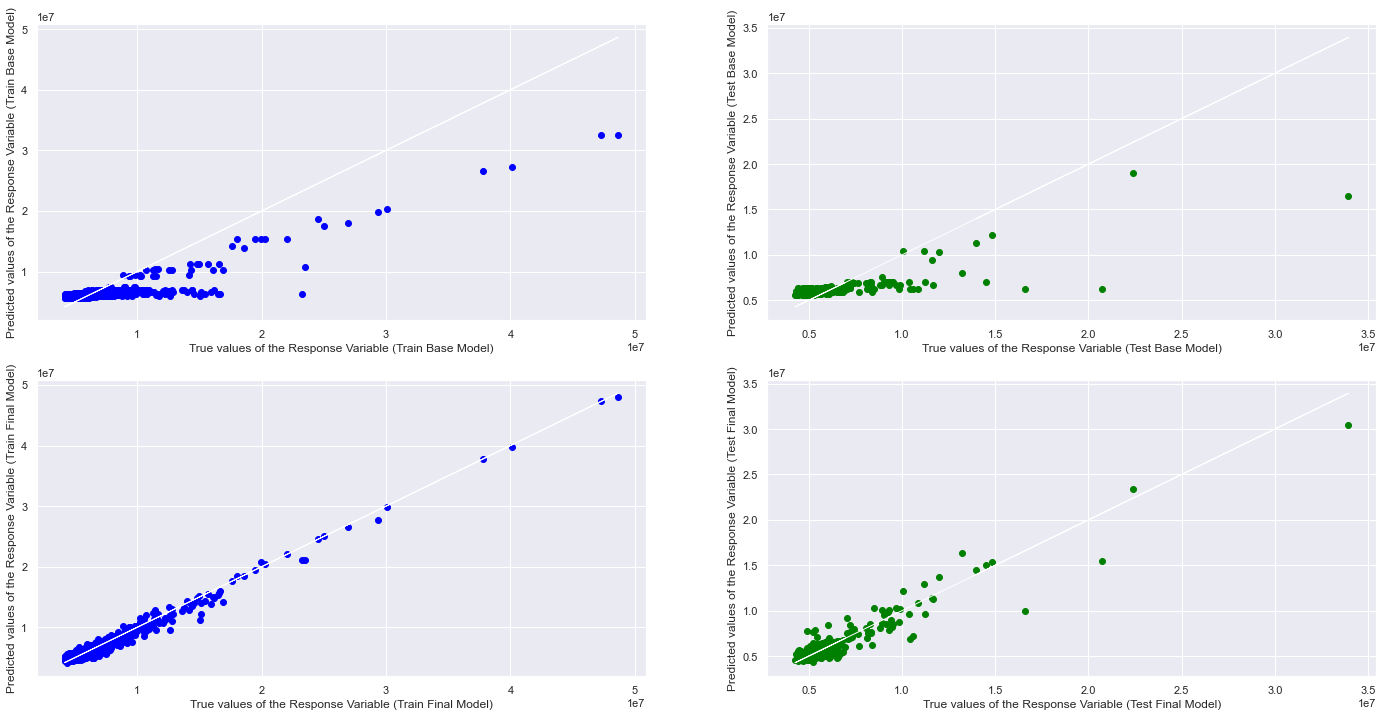

In [50]:
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0,0].scatter(y_train, y_train_pred, color = "blue")
axes[0,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0,0].set_xlabel("True values of the Response Variable (Train Base Model)")
axes[0,0].set_ylabel("Predicted values of the Response Variable (Train Base Model)")
axes[0,1].scatter(y_test, y_test_pred, color = "green")
axes[0,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[0,1].set_xlabel("True values of the Response Variable (Test Base Model)")
axes[0,1].set_ylabel("Predicted values of the Response Variable (Test Base Model)")
axes[1,0].scatter(y_train, y_train_pred2, color = "blue")
axes[1,0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[1,0].set_xlabel("True values of the Response Variable (Train Final Model)")
axes[1,0].set_ylabel("Predicted values of the Response Variable (Train Final Model)")
axes[1,1].scatter(y_test, y_test_pred2, color = "green")
axes[1,1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1,1].set_xlabel("True values of the Response Variable (Test Final Model)")
axes[1,1].set_ylabel("Predicted values of the Response Variable (Test Final Model)")
plt.show()